# Day 1 


In [2]:
import numpy as np
from itertools import permutations

In [ ]:
# check if the sum is equal to the flagnum...
def checkSum(tuple_elements, flagNum):
    y = sum(list(tuple_elements));
    if y==flagNum:
       checkF = True
    else:
        checkF = False
    return checkF

In [ ]:
#Problem 1
# Open file named data.txt
data = np.loadtxt("data_day1.txt", delimiter="\n", unpack = False);
dataClone = data.copy();

In [ ]:
# find all possible permutations from the given data set
ntupleSize = 3;
permutedData = permutations(data[:], ntupleSize)
tsol = 1;
for temp in list(permutedData):
    flag = checkSum(temp, 2020)
    if flag == True:
        print("solutions,  sum , product")
        print(temp, sum(list(temp)), np.prod(temp))
        break

# Day 2

In [1]:
import numpy as np
import pandas as pd

## Procedures

## Repackage data set

In [27]:
fname = "data_day2_prob1.txt"
fdata = open(fname);
data = fdata.readlines()
fdata.close()

In [28]:
# replace ''-'' and '':'' with empty spaces and split each data set into a list
data_split = list()
for k in np.arange(len(data)):
    temp=data[k].replace("-", ' ')
    temp=temp.replace(":", '')
    temp=temp.replace("\n", '')
    data_split.append( temp.split(' '))
    data_split[k][0] = int(data_split[k][0])
    data_split[k][1] = int(data_split[k][1])

## Problem 1

In [13]:
# check if num occurences is within given specifications
def checkduplicates(minCount, maxCount,  charac, InpPassword):
    char_count = InpPassword.count(charac);
    flag = 0
    if (char_count >= minCount)  and (char_count <= maxCount):
        flag = 1
    return flag

In [14]:
# find number of correct passwords 
totalCorrectpass = 0;
for x in data_split:
    totalCorrectpass += checkduplicates(x[0], x[1], x[2], x[3])
print("There are", totalCorrectpass, "valid passwords")
    

There are 465 valid passwords


## Problem 2 


In [42]:
# check if num occurences is within given specifications
def checkduplicates_ind(idx1, idx2,  charac, InpPassword):
    passSize = len(InpPassword);
    flag1 = 0
    flag2 = 0
    if (idx1<passSize):
        if (charac == InpPassword[idx1]):
            flag1 = 1
    if (idx2<passSize):
        if(charac == InpPassword[idx2]):
            flag2 = 1
    
    temp = flag1 + flag2 
    
    if temp == 2 or temp==0:
        flag = 0
    else:
        flag = 1;
        
    return flag
        

In [43]:
totalCorrectpass = 0;
for x in data_split:
    totalCorrectpass += checkduplicates_ind(x[0]-1, x[1]-1, x[2], x[3])
print("There are", totalCorrectpass, "valid passwords")

There are 294 valid passwords


# Day 3 

## Problem 1 

In [412]:
fname = "test_day3.txt"
fdata = open(fname);
data = fdata.readlines()
fdata.close()

## Problem 1

In [413]:
def MoveLocation(initial_position, steps):
    new_position = tuple( np.add(initial_position ,steps) )
    return new_position

def checkTree(currentShape, coords):
    newshape = "O"
    if currentShape == "#" :
        newshape = "X"
    return newshape
def isrowAtEdge(data, data_single_strip, size_col, coords):
    data

    if coords[1]>=size_col:
        k=0
        for d in data:
            data[k] = d+data_single_strip[k];
            k+=1
def ViewMap( data_clone, coords_list ):
    Map = data_clone[:]
    for coords in coords_list[1:-1]:
        oldshape = data_clone[coords[0]][coords[1]]
        newshape = checkTree(oldshape, coords)
        temp = list(data_clone[coords[0]])
        temp[coords[1]] = newshape
        Map[coords[0]] =''.join(temp)
    
    Map_heat = []
    count = 0;
    for M in Map:
        temp = M.replace('.', '-1,');
        temp = temp.replace('#', '1,');
        temp = temp.replace('O', '-1,');
        temp = temp.replace('X', '2,');
        temp = temp[:-1]
        Map_heat.append( list(map(int, temp.split(','))));  
    return Map_heat

In [414]:
# initialisation

data_clone = []
for k  in np.arange(len(data)):
    data_clone.append(data[k].replace("\n", ''))

Map = data_clone[:];

data_single_strip = data_clone[:]

size_col = len(data_clone[1]);
size_row = len(data_clone);

coords = (0, 0)

# enter the steps here 

right = 3;
down = 1;


steps = (down, right);
coords = MoveLocation(coords, steps)

markers_passed = [];
coords_list = [(0, 0)];
#
while size_row > coords[0]:
    isrowAtEdge(data_clone,data_single_strip,  size_col, coords)
    
    size_col = len(data_clone[1]);
    
    oldshape = data_clone[coords[0]][coords[1]]

    newshape = checkTree(oldshape, coords)
    
    temp = list(data_clone[coords[0]])
    temp[coords[1]] = newshape
    Map[coords[0]] =''.join(temp)
    
    markers_passed.append(newshape)
    coords_list.append(coords)
    mp = "".join(markers_passed)
    
    coords = MoveLocation(coords, steps)
    

In [415]:
mp.count('X') ## returns the number of trees traversed

7

In [416]:
MM = np.array(ViewMap( data_clone, coords_list ))

In [417]:
import seaborn as sns

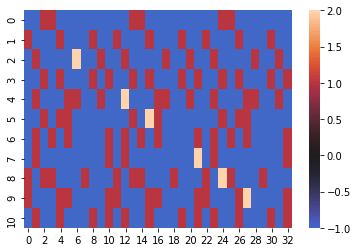

In [418]:
ax = sns.heatmap(MM, center = 0)

In [410]:
?sns.heatmap